## Intro to Data Science
### Final Project:
**Data source**: 'New_Accidents2017_csv' available on **Kaggle**.

This dataset contains data about traffic accidents ocurred in the city of Barcelona in the year 2017. 

This project shall try to identify the ability of some of the features towards predicting the number of victims per accident ocurred. 

The data features and target both are presented as columns in the dataset.

### Loading Data:

#### Importing requiered libraries

In [4]:
# Pandas to load the data file as a Pandas data frame and analyze the data
import pandas as pd
# From Matplotlib I’ve imported pyplot in order to plot graphs of the data
import matplotlib.pyplot as plt
plt.style.use('ggplot')

##### Importing data from .csv file and creating a pandas' DataFrame 

In [5]:
df = pd.read_csv('Accidents_2017.csv')

##### Some basic EDA

In [6]:
print('The shape of df is:', df.shape)

The shape of df is: (10331, 15)


In [7]:
df.dtypes

Id                     int64
District Name         object
Neighborhood Name     object
Street                object
Weekday               object
Month                 object
Day                    int64
Hour                   int64
Part of the day       object
Mild injuries          int64
Serious injuries       int64
Victims                int64
Vehicles involved      int64
Longitude            float64
Latitude             float64
dtype: object

##### Checking linear relationship between variables

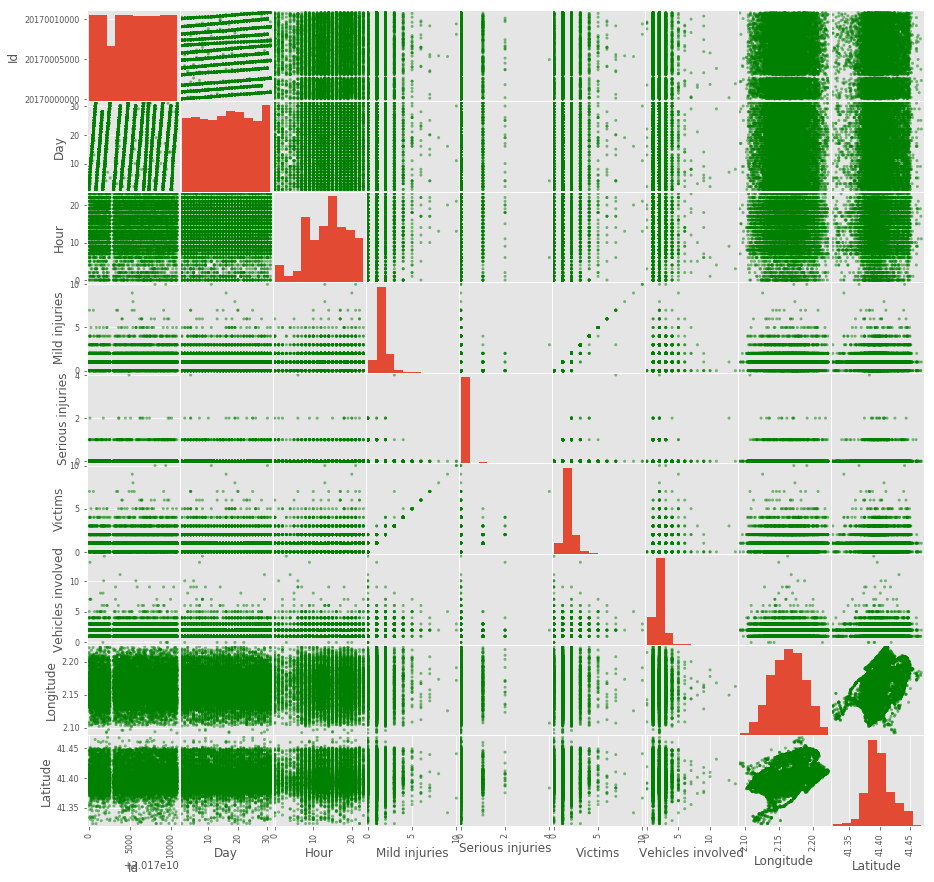

In [3]:
#pd.plotting.scatter_matrix(df, figsize=(15,15),color='green');

### Multiple Linear Regression Analysis

#### Importing requiered libraries

In [8]:
# From Sklearn, sub-library model_selection, I've imported the train_test_split 
from sklearn.model_selection import train_test_split
# From Sklearn, imported the datasets module, so I can load a sample 
# dataset, and the linear_model, so I can run a linear regression 
from sklearn.linear_model import LinearRegression
#from sklearn.metrics import mean_squared_error
#from sklearn.pipeline import make_pipeline
#from sklearn.preprocessing import PolynomialFeatures

#### Dealing with categorical data: dummy variables

In [9]:
dummy = ['District Name', 'Weekday','Month', 'Part of the day']
df_dummy = pd.get_dummies(df[dummy])
df_dummy.head()

,District Name_Ciutat Vella,District Name_Eixample,District Name_Gràcia,District Name_Horta-Guinardó,District Name_Les Corts,District Name_Nou Barris,District Name_Sant Andreu,District Name_Sant Martí,District Name_Sants-Montjuïc,District Name_Sarrià-Sant Gervasi,...,Month_July,Month_June,Month_March,Month_May,Month_November,Month_October,Month_September,Part of the day_Afternoon,Part of the day_Morning,Part of the day_Night
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [10]:
print('The shape of df_dummy is:', df_dummy.shape)

The shape of df_dummy is: (10331, 33)


Our dataframe increased from 15 to 33 columns due to the use of dummy variables. 

#### Adding numerical variables

In [11]:
df_dummy['Vehicles involved'] = df['Vehicles involved']
df_dummy.head()

,District Name_Ciutat Vella,District Name_Eixample,District Name_Gràcia,District Name_Horta-Guinardó,District Name_Les Corts,District Name_Nou Barris,District Name_Sant Andreu,District Name_Sant Martí,District Name_Sants-Montjuïc,District Name_Sarrià-Sant Gervasi,...,Month_June,Month_March,Month_May,Month_November,Month_October,Month_September,Part of the day_Afternoon,Part of the day_Morning,Part of the day_Night,Vehicles involved
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,1
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,2
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,2
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,3


In [12]:
df_dummy.dtypes

District Name_Ciutat Vella           uint8
District Name_Eixample               uint8
District Name_Gràcia                 uint8
District Name_Horta-Guinardó         uint8
District Name_Les Corts              uint8
District Name_Nou Barris             uint8
District Name_Sant Andreu            uint8
District Name_Sant Martí             uint8
District Name_Sants-Montjuïc         uint8
District Name_Sarrià-Sant Gervasi    uint8
District Name_Unknown                uint8
Weekday_Friday                       uint8
Weekday_Monday                       uint8
Weekday_Saturday                     uint8
Weekday_Sunday                       uint8
Weekday_Thursday                     uint8
Weekday_Tuesday                      uint8
Weekday_Wednesday                    uint8
Month_April                          uint8
Month_August                         uint8
Month_December                       uint8
Month_February                       uint8
Month_January                        uint8
Month_July 

#### Creating 'features' and 'target variable'

In [13]:
X = df_dummy
y = df.Victims
# Splitting data with the train_test_split method around '80/20'
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print('X_train shape is{}, y_train length is {}'.format(X_train.shape, len(y_train)))
print('X_test shape is{}, y_test length is {}'.format(X_test.shape, len(y_test)))
#display(X_train.head(), len(X_train))
#display(X_test.head(), len(X_test))
#display(y_train.head(), len(y_train))
#display(y_test.head(), len(y_test))

X_train shape is(8264, 34), y_train length is 8264
X_test shape is(2067, 34), y_test length is 2067


#### Running the Linear Regression model

Accuracy: 0.01


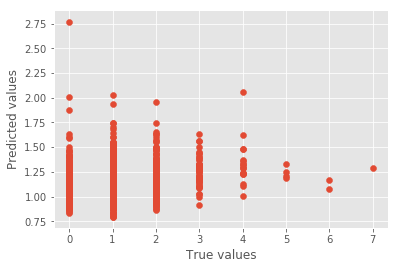

In [14]:
# Setting the model
model = LinearRegression()
# Fitting the model on the training data  
model.fit(X_train, y_train)
# Predicting values  
y_hat_test = model.predict(X_test)
# Printing model's accuracy
print('Accuracy:', round(model.score(X_test, y_test),2))
# Plotting the outcomes
plt.scatter(y_test, y_hat_test)
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.show()

#### Draw a conclusion

The model shows a poor perfomance with only 2% of accuracy when it comes to predict the number of victims per accident occurred. 

In this case, the accurcy's level measures the difference between the observed and estimated values.  

### Trying to improve our analysis

We will add some more numerical features in the aim of improving the accuray level of the model. 

#### Adding numerical variables to our dataframe

We added some numerical variables still left in the original dataframe.

In [15]:
df_dummy['Hour'] = df['Hour']

In [16]:
df_dummy['Day'] = df['Day']

In [17]:
df_dummy['Longitude'] = df['Longitude']

In [18]:
df_dummy['Latitude'] = df['Latitude']

In [19]:
df_dummy.head()

,District Name_Ciutat Vella,District Name_Eixample,District Name_Gràcia,District Name_Horta-Guinardó,District Name_Les Corts,District Name_Nou Barris,District Name_Sant Andreu,District Name_Sant Martí,District Name_Sants-Montjuïc,District Name_Sarrià-Sant Gervasi,...,Month_October,Month_September,Part of the day_Afternoon,Part of the day_Morning,Part of the day_Night,Vehicles involved,Hour,Day,Longitude,Latitude
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,1,4,1,2.151330,41.400771
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,2,2,1,2.182376,41.399680
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,1,6,1,2.166464,41.412769
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,2,7,1,2.157359,41.393310
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,3,7,1,2.193249,41.397908


In [20]:
# Creating 'features' and 'target variable'
X = df_dummy
y = df.Victims
# Splitting data with the train_test_split method around '80/20'
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print('X_train shape is{}, y_train length is {}'.format(X_train.shape, len(y_train)))
print('X_test shape is{}, y_test length is {}'.format(X_test.shape, len(y_test)))
#display(X_train.head(), len(X_train))
#display(X_test.head(), len(X_test))
#display(y_train.head(), len(y_train))
#display(y_test.head(), len(y_test))

X_train shape is(8264, 38), y_train length is 8264
X_test shape is(2067, 38), y_test length is 2067


Accuracy: 0.04


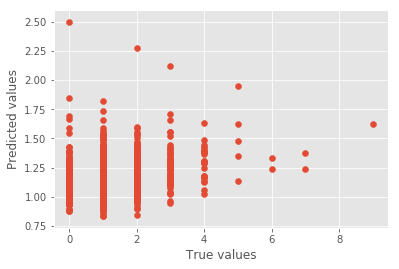

In [21]:
# Setting the model
model = LinearRegression()
# Fitting the model on the training data  
model.fit(X_train, y_train)
# Predicting values  
y_hat_test = model.predict(X_test)
# Printing model's accuracy
print('Accuracy:', round(model.score(X_test, y_test),2))
# Plotting the outcomes
plt.scatter(y_test, y_hat_test)
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.show()

#### Draw a conclusion

Despite having improved the accuracy from 2% to 4%, the predictive ability of our model continue being very insignificant.   